<a href="https://colab.research.google.com/github/LLewis/ai-deep-learning/blob/main/LLewis_Challenge_Class_ANN_multilayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
#Sequential is limited to off shelf models vs
#creating my own customized class(nn.Module) for deep learning models
#defining class in pytorch

#import libraries
import torch
import torch.nn as nn
import numpy as np

#New gives us direct access to functions without create an object, sounds similiar to static is Java
import torch.nn.functional as F

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-65-90559680960d>:15: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [66]:
# Create Data
#Create the data

nPerClust = 100
blur = 1  #this is my standard diviation - shows spreadout the data value (individual data points) is from its cluster

#x , y center quartenants for the data cloud
# so A will be center with x= 1, and y = 3
# and B will be center with x=1, and y = -2
#this changes how the qwerties ,blue boxes and black sqaure are plotted on graph - vertical juxtaposition
A = [1,3]
B = [1,-2]

#Generate Data
#add random numbers to each element value in  vector A and B
a = [ A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur, B[1]+ np.random.randn(nPerClust)*blur ]

#Creating the Category labels -dummy coded category labels - coverting to numbers
#one half of data is qwerty type ZEROS and the other half is qwerty type ONES
#this creates the categories
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))

#here I'm stacking each vector into one data matrix (array) - concatenate into a matrix using T - Transpose
data_np = np.hstack((a,b)).T

#Convert to a pytorch tensor - a vector in pytorch
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

In [72]:
#Create class for ANN mutilayer
def createANNmodel(learningRate):

    class theClass4ANNMultilayer(nn.Module):
      def __init__ (self):
        super().__init__()

        #input layer
        self.input = nn.Linear(2,16)

        #hiddent layer
        self.hidden = nn.Linear(16,1)

        #output layer
        self.output = nn.Linear(1,1)

      #forward pass
      def forward(self, x):

        #input layer
        x = self.input(x) #x goes through the Linear layer here
                           #can combine - x = F.relu(self.input(x)) the activation func executes after the weighted sum of of the inputs from Linear function
        x = F.relu(x)

        #hidden layer
        x = self.hidden(x)
        x = F.relu(x)

        #return output layer
        x = self.output(x)
        x = torch.sigmoid(x)
        return x     #returns the model

  #createn the model instance
    ANNclassify = theClass4ANNMultilayer()

    #loss function
    lossfun = nn.BCELoss()

    #optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

    return ANNclassify,lossfun,optimizer










In [ ]:
numepochs = 100

def trainTheModel(ANNmodel):

  #initialize losses
  losses = torch.zeros(numepochs)

  #loop over epochs
  for epochi in range(numepochs):

    #forward pass
    yHat = ANNmodel(data)

    #compute the loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    #backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


  #final forward pass
  predictions = ANNmodel(data)

  #compute the predictions and report accuracy
  # NOTE:  Wasn't this ">0" previously ? ! - reason - Im using the actual Sigmoid function - so I set its center .5 ? unlike if I would have
  # used the BCEWeightLogitsLoss() function, it calculates in the Sigmoid center .5 and therefore in previous coding exercise I used .0 in comparison
  totalacc = 100*torch.mean(((predictions>.5) == labels).float())   #.5 is the decision boundary


  return losses,predictions,totalacc


Final accuracy: 98.5%


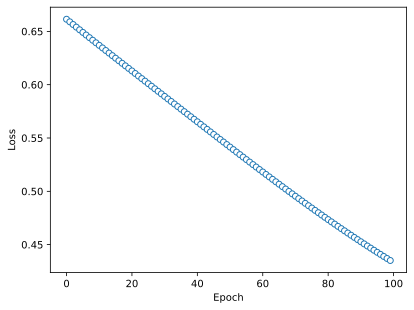

In [89]:
from functools import total_ordering
#create everything here

ANNclassify,lossfun,optimizer = createANNmodel(.01)

#Run it
losses,predictions,totalacc = trainTheModel(ANNclassify)

#report accuracy
print('Final accuracy: %g%%' %totalacc)

#Show the losses
plt.plot(losses.detach(), 'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

